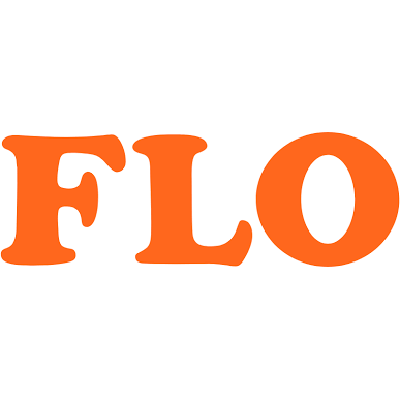

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("C:/Users/can/Desktop/flo_data_20k.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [6]:
df.shape

(19945, 12)

In [7]:
df.tail()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]"
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR]
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR]
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]"
19944,740998d2-b1f7-11e9-89fa-000d3a38a36f,Android App,Android App,2019-09-03,2020-06-06,2020-06-06,2019-09-03,1.0,1.0,39.99,221.98,"[KADIN, AKTIFSPOR]"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

### Feature Engineering

In [9]:
df[["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]] = df[["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]].apply(pd.to_datetime)

In [10]:
df["Omnichannel"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

In [11]:
df["TotalPrice"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [12]:
df["last_order_date"].max()


Timestamp('2021-05-30 00:00:00')

In [13]:
today_date = dt.datetime(2021,6,2)


In [14]:
df["recency"] = today_date - df["last_order_date"].max()

In [15]:
df["recency"] = df["recency"].apply(lambda x: x.days)

In [16]:
df["recency_online"] = today_date - df["last_order_date_online"].max()

In [17]:
df["recency_online"] =  df["recency_online"].apply(lambda x: x.days)

In [18]:
df["recency_offline"] = df["recency_offline"] = today_date - df["last_order_date_offline"].max()

In [19]:
df["recency_offline"] =  df["recency_offline"].apply(lambda x: x.days)

In [20]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"] 
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
  cat_cols += num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]
  return cat_cols, num_cols, cat_but_car

In [21]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


In [22]:
num_cols = df[num_cols]

In [23]:
num_cols.head(2)

,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,Omnichannel,TotalPrice
0,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,5.0,939.37
1,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,21.0,2013.55


In [24]:
date_col = [col for col in df.columns if df[col].dtypes == "datetime64[ns]"]


In [25]:
num_cols = num_cols.drop(date_col,axis=1)

In [26]:
sc = MinMaxScaler((0,1))

In [27]:
df = pd.DataFrame(sc.fit_transform(num_cols),columns= num_cols.columns)

## KMeans

In [28]:
kmeans = KMeans()
ssd = []
K = range(1,30)

In [29]:
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

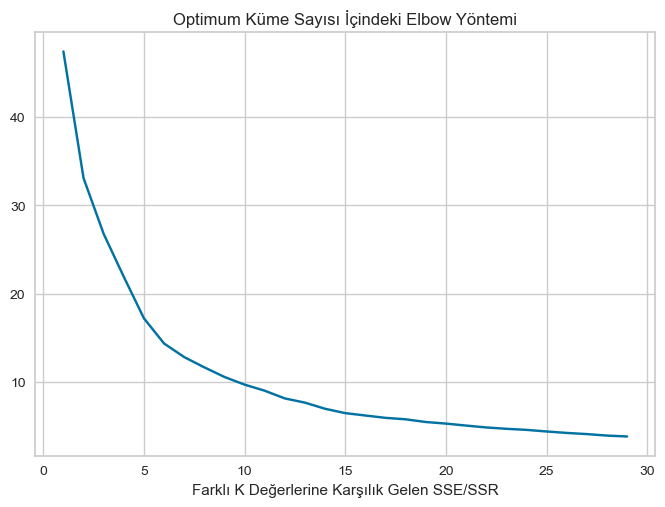

In [30]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Gelen SSE/SSR")
plt.title("Optimum Küme Sayısı İçindeki Elbow Yöntemi")
plt.show()

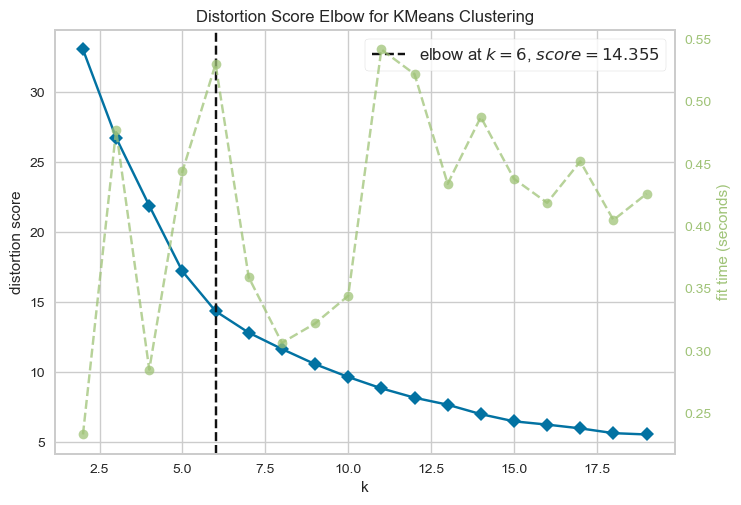

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans,k=(2,20))
elbow.fit(df)
elbow.show()

In [32]:
elbow.elbow_value_

6

In [33]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [34]:
clusters_kmeans = kmeans.labels_

In [35]:
df["kmeans_clusters"] = clusters_kmeans

In [36]:
df["kmeans_clusters"] = df["kmeans_clusters"] + 1

In [37]:
df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,Omnichannel,TotalPrice,kmeans_clusters
0,0.015075,0.000000,0.007178,0.017395,0.015,0.019503,3
1,0.090452,0.009259,0.008281,0.040715,0.095,0.042926,6
2,0.010050,0.009259,0.009938,0.008458,0.015,0.011782,3
3,0.000000,0.000000,0.001656,0.001526,0.000,0.001679,3
4,0.000000,0.000000,0.002208,0.003252,0.000,0.003598,3


In [38]:
df.groupby("kmeans_clusters").agg(["count","mean","median"])

order_num_total_ever_online                      \
                                      count      mean    median   
kmeans_clusters                                                   
1                                      2866  0.031603  0.030151   
2                                         7  0.442211  0.341709   
3                                     14249  0.003995  0.000000   
4                                        14  0.010768  0.005025   
5                                      2341  0.006749  0.005025   
6                                       468  0.096186  0.085427   

                order_num_total_ever_offline                      \
                                       count      mean    median   
kmeans_clusters                                                    
1                                       2866  0.006539  0.000000   
2                                          7  0.005291  0.000000   
3                                      14249  0.004263  0.000000   
4                                         14  0.475529  0.416667   
5                                       2341  0.032548  0.027778   
6                                        468  0.013671  0.009259   

                customer_value_total_ever_offline                      \
                                            count      mean    median   
kmeans_clusters                                                         
1                                            2866  0.011154  0.008834   
2                                               7  0.027802  0.029208   
3                                           14249  0.009574  0.007730   
4                                              14  0.313596  0.213054   
5                                            2341  0.037520  0.033125   
6                                             468  0.016767  0.010511   

                customer_value_total_ever_online                      \
                                           count      mean    median   
kmeans_clusters                                                        
1                                           2866  0.025659  0.023348   
2                                              7  0.606188  0.678554   
3                                          14249  0.005921  0.004623   
4                                             14  0.016142  0.004256   
5                                           2341  0.008059  0.006215   
6                                            468  0.069332  0.061245   

                Omnichannel                   TotalPrice                      
                      count      mean  median      count      mean    median  
kmeans_clusters                                                               
1                      2866  0.034976  0.0300       2866  0.029219  0.026866  
2                         7  0.442857  0.3400          7  0.608055  0.679947  
3                     14249  0.006278  0.0050      14249  0.009137  0.008198  
4                        14  0.267500  0.2325         14  0.139265  0.097112  
5                      2341  0.024291  0.0200       2341  0.022280  0.020143  
6                       468  0.103088  0.0950        468  0.074487  0.066657

In [39]:
df.to_csv("floclusters.csv")

<br>

## Hiyerarşik Kümeleme


In [40]:
hc_average = linkage(df,"average")

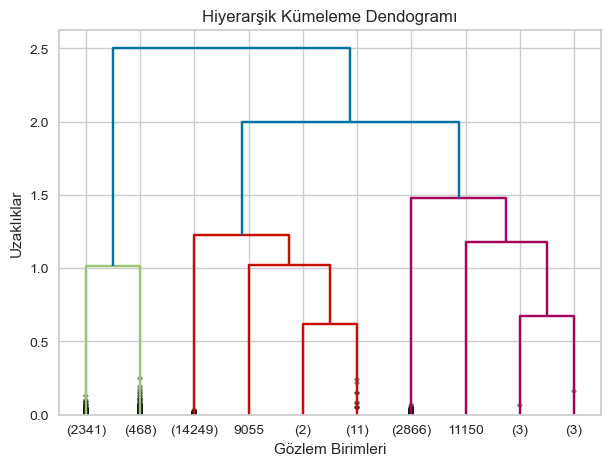

In [41]:
plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")


In [44]:
clusters = cluster.fit_predict(df)


In [45]:
df["hi_cluster_no"] = clusters


In [46]:
df["hi_cluster_no"] = df["hi_cluster_no"] + 1


In [47]:
df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,Omnichannel,TotalPrice,kmeans_clusters,hi_cluster_no
0,0.015075,0.000000,0.007178,0.017395,0.015,0.019503,3,5
1,0.090452,0.009259,0.008281,0.040715,0.095,0.042926,6,2
2,0.010050,0.009259,0.009938,0.008458,0.015,0.011782,3,5
3,0.000000,0.000000,0.001656,0.001526,0.000,0.001679,3,5
4,0.000000,0.000000,0.002208,0.003252,0.000,0.003598,3,5


In [48]:
df.groupby("hi_cluster_no").agg(["count","mean","median"])

order_num_total_ever_online                      \
                                    count      mean    median   
hi_cluster_no                                                   
1                                       7  0.442211  0.341709   
2                                    2809  0.021650  0.005025   
3                                      14  0.010768  0.005025   
4                                    2866  0.031603  0.030151   
5                                   14249  0.003995  0.000000   

              order_num_total_ever_offline                      \
                                     count      mean    median   
hi_cluster_no                                                    
1                                        7  0.005291  0.000000   
2                                     2809  0.029403  0.027778   
3                                       14  0.475529  0.416667   
4                                     2866  0.006539  0.000000   
5                                    14249  0.004263  0.000000   

              customer_value_total_ever_offline                      \
                                          count      mean    median   
hi_cluster_no                                                         
1                                             7  0.027802  0.029208   
2                                          2809  0.034062  0.030921   
3                                            14  0.313596  0.213054   
4                                          2866  0.011154  0.008834   
5                                         14249  0.009574  0.007730   

              customer_value_total_ever_online  ...           Omnichannel  \
                                         count  ...    median       count   
hi_cluster_no                                   ...                         
1                                            7  ...  0.678554           7   
2                                         2809  ...  0.007903        2809   
3                                           14  ...  0.004256          14   
4                                         2866  ...  0.023348        2866   
5                                        14249  ...  0.004623       14249   

                                TotalPrice                      \
                   mean  median      count      mean    median   
hi_cluster_no                                                    
1              0.442857  0.3400          7  0.608055  0.679947   
2              0.037419  0.0250       2809  0.030978  0.022126   
3              0.267500  0.2325         14  0.139265  0.097112   
4              0.034976  0.0300       2866  0.029219  0.026866   
5              0.006278  0.0050      14249  0.009137  0.008198   

              kmeans_clusters                   
                        count      mean median  
hi_cluster_no                                   
1                           7  2.000000    2.0  
2                        2809  5.166607    5.0  
3                          14  4.000000    4.0  
4                        2866  1.000000    1.0  
5                       14249  3.000000    3.0  

[5 rows x 21 columns]